In [9]:
dir_imagens_analises = '/home/davi/Desktop/unb/mestrado/dissertacao/dissertacao_davi/Textos/financial_derivatives/imagens'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

def salvar_grafico(plt: plt, nome_grafico: str, dir_imagens_analises: str=dir_imagens_analises, type_imagem: str='.pdf'):
    #salvar no repositório do script
    plt.savefig(f'./imagens/{nome_grafico}.pdf')

    #salvar no repositório de análises
    plt.savefig(f'{dir_imagens_analises}/{nome_grafico}.pdf')

### Gráfico Delta

<>:40: SyntaxWarning: invalid escape sequence '\D'
<>:40: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_163469/4192621556.py:40: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('Incrementos $\Delta S$ e $\Delta V$ no Gráfico de $V(S)$')


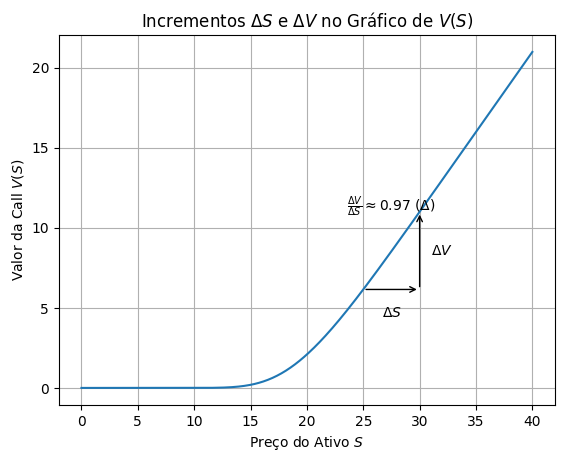

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parâmetros do modelo
K = 20        # Strike
r = 0.05      # Taxa livre de risco anual
sigma = 0.2   # Volatilidade anual
T = 1.0       # Tempo até vencimento (anos)
nome_grafico = 'delta'

# Gera eixos
S = np.linspace(0, 40, 400)

# CDF da Normal via math.erf
vector_erf = np.vectorize(math.erf)
def norm_cdf(x):
    return 0.5 * (1 + vector_erf(x / math.sqrt(2)))

# Função Black-Scholes para call europeia
def bs_call(S, K, r, T, sigma):
    d1 = (np.log(np.maximum(S, 1e-9) / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm_cdf(d1) - K * np.exp(-r * T) * norm_cdf(d2)

# Calcula valor da call
V = bs_call(S, K, r, T, sigma)

# Ponto de demonstração
S0 = 25
delta_S = 5
V0 = bs_call(S0, K, r, T, sigma)
V1 = bs_call(S0 + delta_S, K, r, T, sigma)

# Plot
fig, ax = plt.subplots()
ax.plot(S, V)
ax.set_xlabel('Preço do Ativo $S$')
ax.set_ylabel('Valor da Call $V(S)$')
ax.set_title('Incrementos $\Delta S$ e $\Delta V$ no Gráfico de $V(S)$')

# Desenha setas para ΔS e ΔC
ax.annotate('', xy=(S0 + delta_S, V0), xytext=(S0, V0),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(S0 + delta_S, V1), xytext=(S0 + delta_S, V0),
            arrowprops=dict(arrowstyle='->'))

# Anotações de texto
ax.text(S0 + delta_S/2, V0 - 1, r'$\Delta S$', ha='center', va='top')
ax.text(S0 + delta_S + 1, V0 + (V1 - V0)/2, r'$\Delta V$', ha='left', va='center')
# Slope annotation
slope = (V1 - V0) / delta_S
ax.text(S0 + delta_S/2, V0 + (V1 - V0)/2 + 2,
        rf'$\frac{{\Delta V}}{{\Delta S}}\approx {slope:.2f}\ (\Delta)$',
        ha='center', va='bottom')

ax.grid(True)
salvar_grafico(plt=plt,nome_grafico=nome_grafico)
plt.show()


# No gráfico acima:

# Eixo X: preço do ativo .

# Eixo Y: valor da call  pela fórmula de Black–Scholes.

# A seta horizontal representa o incremento .

# A seta vertical representa o incremento .

# A equação  ilustra a razão entre os incrementos, que aproxima a derivada  (sensibilidade do preço da opção).

# Esse desenho ajuda a visualizar o conceito de derivada como o coeficiente angular de uma reta secante que aproxima a inclinação da curva.


In [19]:
import pandas as pd
import numpy as np
import math

# Parâmetros
S0 = 100       # Preço inicial do ativo em t0
r = 0.05       # Taxa livre de risco anual
sigma = 0.2    # Volatilidade anual
T = 0        # Maturidade (anos)
strikes = list(range(60, 151, 10))  # 60, 70, ..., 150

# Funções auxiliares
def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def bs_call(S, K, r, tau, sigma):
    if tau <= 0:
        return max(S - K, 0)
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
    d2 = d1 - sigma * math.sqrt(tau)
    return S * norm_cdf(d1) - K * math.exp(-r * tau) * norm_cdf(d2)

# Valor do ativo em T
S_T = S0 * math.exp(r * T)

data = []
for K in strikes:
    premium = bs_call(S0, K, r, T, sigma)            # V_c(t0)
    portfolio_T = premium - S_T                      # V_c(t0) - S_T
    pv_portfolio = portfolio_T * math.exp(-r * T)    # Valor presente do payoff
    
    data.append({
        'Strike (K)': K,
        'Prêmio$': round(premium, 2),
        'Valor da ação $S$ em T': round(S_T, 2),
        'Portfolio Payoff at T $V_c(t_0)-S_T$': round(portfolio_T, 2),
        'Present Value of Portfolio': round(pv_portfolio, 2)
    })

df = pd.DataFrame(data)
df


,Strike (K),Prêmio$,Valor da ação $S$ em T,Portfolio Payoff at T $V_c(t_0)-S_T$,Present Value of Portfolio
0,60,40,100.0,-60.0,-60.0
1,70,30,100.0,-70.0,-70.0
2,80,20,100.0,-80.0,-80.0
3,90,10,100.0,-90.0,-90.0
4,100,0,100.0,-100.0,-100.0
5,110,0,100.0,-100.0,-100.0
6,120,0,100.0,-100.0,-100.0
7,130,0,100.0,-100.0,-100.0
8,140,0,100.0,-100.0,-100.0
9,150,0,100.0,-100.0,-100.0


In [24]:
import pandas as pd
import numpy as np
import math

# Parâmetros
S0 = 100       # Preço inicial do ativo em t0
r = 0.05       # Taxa livre de risco anual
sigma = 0.2    # Volatilidade anual
T = 0        # Maturidade (anos)
strikes = list(range(60, 151, 10))  # 60, 70, ..., 150

# Funções auxiliares
def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def bs_call(S, K, r, tau, sigma):
    if tau <= 0:
        return max(S - K, 0)
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
    d2 = d1 - sigma * math.sqrt(tau)
    return S * norm_cdf(d1) - K * math.exp(-r * tau) * norm_cdf(d2)

def bs_delta(S, K, r, tau, sigma):
    if tau <= 0:
        return 1.0 if S > K else 0.0
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
    return norm_cdf(d1)

# Valor do ativo em T
S_T = S0 * math.exp(r * T)

data = []
for K in strikes:
    premium = bs_call(S0, K, r, T, sigma)            # V_c(t0)
    portfolio_T = premium - S_T                      # V_c(t0) - S_T
    pv_portfolio = portfolio_T * math.exp(-r * T)    # Valor presente do payoff
    delta0 = bs_delta(S0, K, r, T, sigma)            # Delta no tempo t0
    
    data.append({
        'Strike (K)': K,
        'Premium at t0 (V_c(t0))': round(premium, 2),
        'Asset at T (S_T)': round(S_T, 2),
        'Portfolio Payoff at T (V_c(t0)-S_T)': round(portfolio_T, 2),
        'Present Value': round(pv_portfolio, 2),
        'Quantidade de ações (Δ)': round(delta0, 2)
    })

df = pd.DataFrame(data)
df


,Strike (K),Premium at t0 (V_c(t0)),Asset at T (S_T),Portfolio Payoff at T (V_c(t0)-S_T),Present Value,Quantidade de ações (Δ)
0,60,40,100.0,-60.0,-60.0,1.0
1,70,30,100.0,-70.0,-70.0,1.0
2,80,20,100.0,-80.0,-80.0,1.0
3,90,10,100.0,-90.0,-90.0,1.0
4,100,0,100.0,-100.0,-100.0,0.0
5,110,0,100.0,-100.0,-100.0,0.0
6,120,0,100.0,-100.0,-100.0,0.0
7,130,0,100.0,-100.0,-100.0,0.0
8,140,0,100.0,-100.0,-100.0,0.0
9,150,0,100.0,-100.0,-100.0,0.0


In [33]:
import pandas as pd
import numpy as np
import math

# Parâmetros
S0 = 100       # Preço do ativo em t0
r = 0.05       # Taxa livre de risco anual
sigma = 0.2    # Volatilidade anual
T = 0        # Maturidade (anos)
strikes = [60, 70, 80, 90, 100, 110, 120]  # 7 strikes

# Funções auxiliares
def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def bs_call(S, K, r, tau, sigma):
    if tau <= 0:
        return max(S - K, 0)
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
    d2 = d1 - sigma * math.sqrt(tau)
    return S * norm_cdf(d1) - K * math.exp(-r * tau) * norm_cdf(d2)

# Valor do ativo em T
S_T = S0 * math.exp(r * T)

# Montagem da tabela
data = []
for K in strikes:
    premium = bs_call(S0, K, r, T, sigma)        # Prêmio em t0
    call_T = max(S_T - K, 0)                     # Valor da call em T
    portfolio_value = premium*math.exp(r * T)                     # Portfólio é apenas a call
    pnl = portfolio_value - call_T             # PnL = valor final - prêmio
    data.append({
        'Strike (K)': K,
        'S0': round(S0, 2),
        'Premium at t0': round(premium, 2),
        'ST': round(S_T, 2),
        'Call Value at T': round(call_T, 2),
        'Portfolio Value at T': round(portfolio_value, 2),
        'PnL': round(pnl, 2)
    })

df = pd.DataFrame(data)
df


,Strike (K),S0,Premium at t0,ST,Call Value at T,Portfolio Value at T,PnL
0,60,100,40,100.0,40.0,40.0,0.0
1,70,100,30,100.0,30.0,30.0,0.0
2,80,100,20,100.0,20.0,20.0,0.0
3,90,100,10,100.0,10.0,10.0,0.0
4,100,100,0,100.0,0.0,0.0,0.0
5,110,100,0,100.0,0.0,0.0,0.0
6,120,100,0,100.0,0.0,0.0,0.0
